In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer, LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression

#  Régression Linéaire Simple

In [2]:
reg=pd.read_csv("reg_simple.csv")
reg.head()

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21


In [3]:
X=np.array(reg['heure_rev'])
Y=np.array(reg['note'])
X=X.reshape(X.shape[0],1)
Y=Y.reshape(Y.shape[0],1)

ssc= StandardScaler()
X=ssc.fit_transform(X)
Y=ssc.fit_transform(Y)

<function matplotlib.pyplot.show(*args, **kw)>

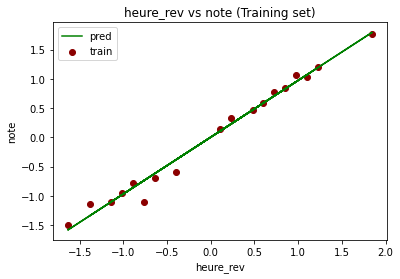

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 1/3, shuffle=True)
regres = LinearRegression()
regres.fit(X_train, Y_train)
Y_pred = regres.predict(X_test)

plt.scatter(X_train, Y_train, color = 'darkred', label='train')
plt.plot(X_train, regres.predict(X_train), color = 'green', label='pred')
plt.title('heure_rev vs note (Training set)')
plt.xlabel('heure_rev')
plt.ylabel('note')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

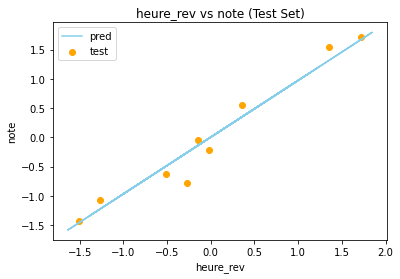

In [5]:
plt.scatter(X_test, Y_test, color = 'orange', label='test')
plt.plot(X_train, regres.predict(X_train), color = 'skyblue', label='pred')
plt.title('heure_rev vs note (Test Set)')
plt.xlabel('heure_rev')
plt.ylabel('note')
plt.legend()
plt.show

In [6]:
mean_squared_error(Y_pred, Y_test)

0.050602368519393696

In [7]:
mean_absolute_error(Y_pred, Y_test)

0.17914339108712637

#  Régression Linéaire Multiple

In [8]:
boston=pd.read_csv("boston_house_prices.csv")
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
boston.corrwith(boston['MEDV'], method='pearson').abs().sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
dtype: float64

In [10]:
X=boston.iloc[:,:-1]
Y=boston['MEDV']

X=np.array(X)
Y=np.array(Y)

Y=Y.reshape(Y.shape[0],1)

ssc= StandardScaler()
X=ssc.fit_transform(X)
Y=ssc.fit_transform(Y)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, shuffle=True)

ssc= StandardScaler()
X_train=ssc.fit_transform(X_train)
X_test=ssc.fit_transform(X_test)
Y_train=ssc.fit_transform(Y_train)
Y_test=ssc.fit_transform(Y_test)

regres = LinearRegression()
regres.fit(X_train, Y_train)
regres.score(X_train, Y_train)
Y_pred1 = regres.predict(X_train)
Y_test1= regres.predict(X_test)

Text(0.5, 0, 'MEDV')

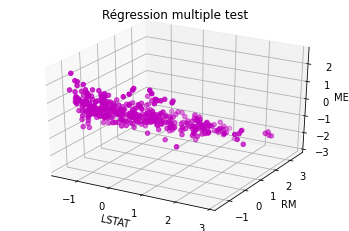

In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train[:,4], X_train[:,12], Y_pred1, c='m')
ax.set_title("Régression multiple test")
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

Text(0.5, 0, 'MEDV')

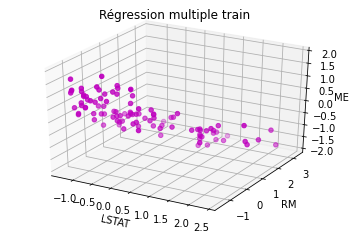

In [13]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')

ax1.scatter(X_test[:,4],X_test[:,12], Y_test1, c='m')
ax1.set_title("Régression multiple train")
ax1.set_xlabel("LSTAT")
ax1.set_ylabel("RM")
ax1.set_zlabel("MEDV")

#  Régression Polynomiale pour Position Salaries

In [15]:
ps=pd.read_csv("Position_Salaries.csv")
ps.head()

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


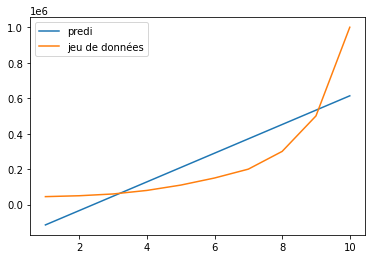

In [16]:
X=ps['Level']
Y=ps['Salary']

X=np.array(X)
Y=np.array(Y)

X=X.reshape(X.shape[0],1)

lr=LinearRegression()

lr.fit(X,Y)
Y_predi=lr.predict(X)
plt.plot(X, Y_predi, label="predi")
plt.plot(X,Y, label="jeu de données")
plt.legend()

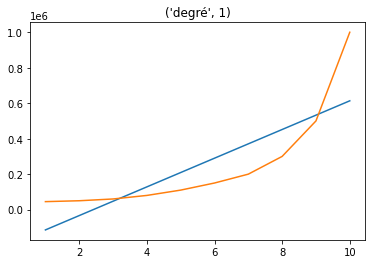

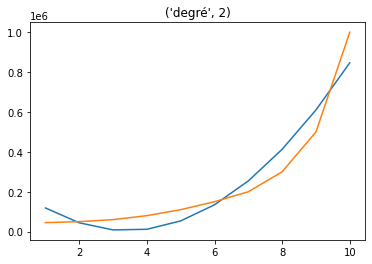

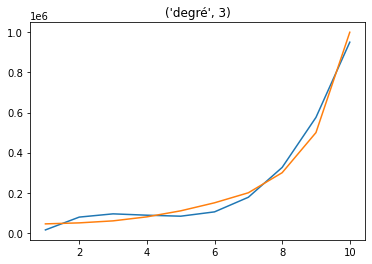

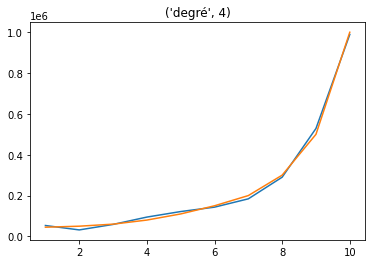

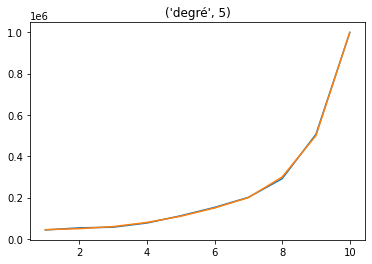

In [17]:
for i in range(1,6):
    vari= PolynomialFeatures(i).fit_transform(X)

    lr.fit(vari,Y)
    Y_pre=lr.predict(vari)
    
    
    plt.figure()
    
    str = "degré", i
    
    plt.title(str)
    
    plt.plot(X,Y_pre)
    plt.plot(X,Y)
    plt.show()

#  Régression Polynomiale pour qualité vin rouge

In [18]:
qvr=pd.read_csv("qualite-vin-rouge.csv")
qvr.head()

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorures,dioxyde de soufre libre,anhydride sulfureux total,densité,pH,sulphates,alcool,qualité
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
qvr.corrwith(qvr['qualité'], method='pearson').abs().sort_values(ascending=False)

qualité                      1.000000
alcool                       0.476166
acidité volatile             0.390558
sulphates                    0.251397
acide citrique               0.226373
anhydride sulfureux total    0.185100
densité                      0.174919
chlorures                    0.128907
acidité fixe                 0.124052
pH                           0.057731
dioxyde de soufre libre      0.050656
sucre résiduel               0.013732
dtype: float64

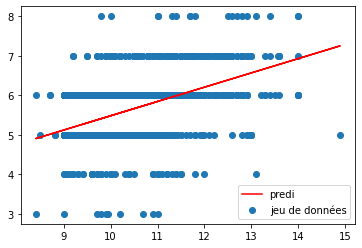

In [25]:
x=qvr['alcool']
y=qvr['qualité']

x=np.array(x)
y=np.array(y)

x=x.reshape(x.shape[0],1)

lr=LinearRegression()

lr.fit(x,y)
y_predi=lr.predict(x)
plt.plot(x, y_predi, c='r', label="predi")
plt.scatter(x,y, label="jeu de données")
plt.legend()

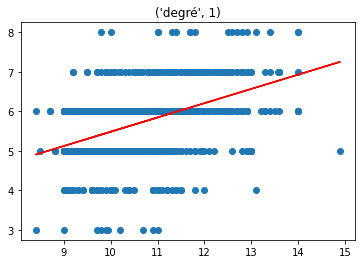

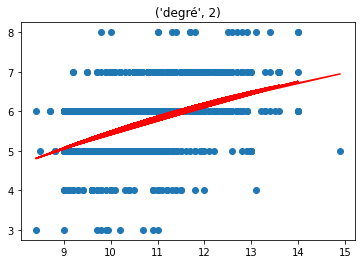

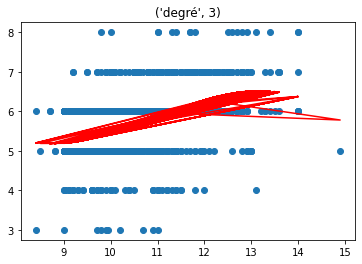

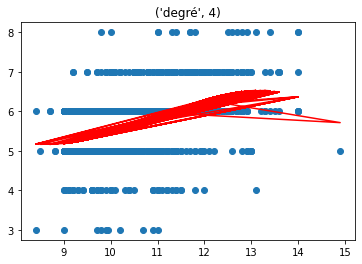

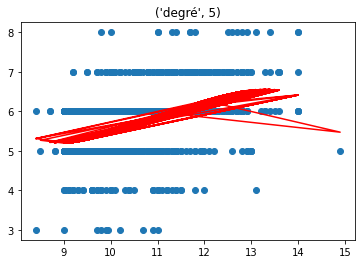

In [31]:
for i in range(1,6):
    var= PolynomialFeatures(i).fit_transform(x)

    lr.fit(var,y)
    y_pre=lr.predict(var)
    
    
    plt.figure()
    
    str = "degré", i
    
    plt.title(str)
    
    plt.plot(x,y_pre,'-', c='r')
    plt.scatter(x,y)
    plt.show()